In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
import os
import glob
import scipy.io
import numpy as np2
import matplotlib.pyplot as plt
import pickle
npr.seed(0)

import ssm
import smartload.smartload as smart
from src.exputils import load_multiple_sessions, make_savedict
import src.blockhmm_validation as bval
from src.utils import pathsetup
npr.seed(0)

%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
# Setup evaluation parameters
nstates_lst=np.arange(1, 9)
N_iters=3000
frac_train=0.8

In [6]:
version='122221b'
filepath = f'/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/{version}'
files = glob.glob(filepath + '/*.mat')
filenames = [item.split('/')[-1] for item in files if 'all_sessions' in item]
animal_lst = [file.split('_')[0] for file in filenames]

params = dict(nstates_lst=np.arange(1, 9),
                  N_iters=3000,
                  frac_train=0.8,
                 version='122221b',
             fitrangefile='/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/102121/fitranges_122221.mat')


# initial seed = 123
ll_lst_all = []
test_lens = []
for animal in animal_lst:
    print(f'Analyzing animal {animal}')
    ll_lst, nstates_lst, obs_train, obs_test = bval.run_and_validate(animal, 124, params)
    test_lens.append(obs_test.shape[0])
    ll_lst_all.append(ll_lst)

Analyzing animal fh03
Starting run and save for fh03, seed 124


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.9776377117969823


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.7821939170947676


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 3.1409975138152686


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 3.1316725235925387


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 3.0621692811383556


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 3.0794729704818375


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.9631655205055987


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.903196018272181
[1 2 3 4 5 6 7 8]
[0.9776377117969823, 2.7821939170947676, 3.1409975138152686, 3.1316725235925387, 3.0621692811383556, 3.0794729704818375, 2.9631655205055987, 2.903196018272181]
Analyzing animal f16
Starting run and save for f16, seed 124


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: 

2
4
2
7
3
7
2
5
4
1
2
1
1
1
1
3
7
0
4
2
5


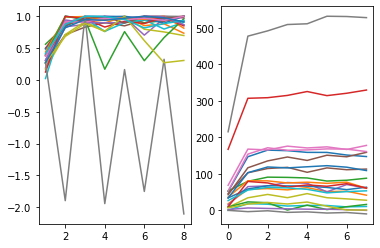

In [5]:
aic_lst = []
for i in range(len(ll_lst_all)):
    plt.subplot(121)
    idmax = np.argmax(ll_lst_all[i])
    plt.plot(np.arange(1, 9), ll_lst_all[i] / max(ll_lst_all[i]))
    aic = np.array(ll_lst_all[i]) * test_lens[i] * np.log(2) - np.arange(1, 9)
    plt.subplot(122)
    aic_lst.append(aic)
    plt.plot(aic)

In [13]:
# Load the saved pkl file
version = '021322'
paths = pathsetup('matchingsim')
rootdir = f"{paths['blockhmmfitpath']}/K_selection/"
savedfilepath = rootdir + f"blockhmm_validation_{version}.pkl"
matfilepath = rootdir + f"blockhmm_validation_{version}.mat"

data = dict(animal_lst=animal_lst,
                ll_lst_all=ll_lst_all,
                params=params,
                 aic_lst=aic_lst,
                seed=123,
           nstates_lst=nstates_lst, frac_train=frac_train, N_iters=N_iters,
                version=version, savedfilepath=savedfilepath, matfilepath=matfilepath)


In [14]:
scipy.io.savemat(matfilepath, data)


